<a href="https://colab.research.google.com/github/AndresR2909/Trabajo_final_redes_neuronales_1/blob/main/Trabajo_final_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="left">
<p><img alt="Sapiencia" height="140px" src="https://ubicua.ingeniaudea.co/pluginfile.php/32974/coursecat/description/RF_RedesNeuronales.png" align="left" hspace="10px" vspace="0px"></p></div>
<div align="left"></div>
<div>

<br></br>

<div align="left">
<br></br>
<br></br>



<hr size=10 noshade color="#663398">
</p>

<div align="right">
<h1> <b> Trabajo final redes neuronales </b> </h1>
<br>


**El presente material hace parte de la ruta de formación del talento especializado de SAPIENCIA**

**Los documentos que utilizaremos en la presente y proximas clases son una mezcla del trabajo de muchos profesores y académicos.**

**En caso de utilizar el presente contenido favor citarlo y brindar los créditos respectivos.**

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


---

In [1]:
pip install tensorflow

In [2]:
pip install keras

In [3]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
# Aplana las imágenes y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
train_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data_df.shape

(60000, 784)

In [8]:
train_data.shape

(60000, 28, 28)

In [9]:
train_data_df[0]

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: 0, Length: 60000, dtype: uint8

In [10]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

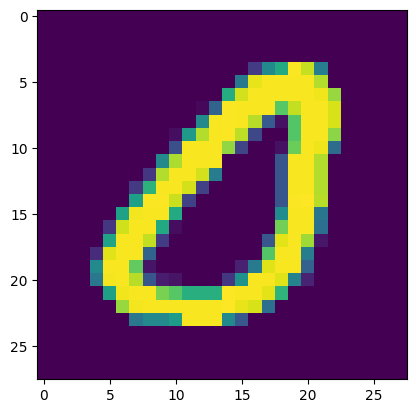

In [11]:
plt.imshow(train_data[689])

In [12]:
train_labels[689]

0

Cambio de dimension de las imagenes de 28 x 28 a 16 x 16

In [13]:
pip install opencv-python


In [14]:
import cv2
from keras.datasets import mnist
import numpy as np

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Tamaño al que deseas redimensionar las imágenes
new_size = (16, 16)

# Crear listas vacías para almacenar las nuevas imágenes
new_train_images = []
new_test_images = []

# Redimensionar las imágenes de entrenamiento
for image in train_images:
    resized_image = cv2.resize(image, new_size)
    new_train_images.append(resized_image)

# Redimensionar las imágenes de prueba
for image in test_images:
    resized_image = cv2.resize(image, new_size)
    new_test_images.append(resized_image)

# Convertir las listas en arreglos NumPy
new_train_images = np.array(new_train_images)
new_test_images = np.array(new_test_images)

# Comprobar las formas de los nuevos arreglos de imágenes
print("Shape of resized training images:", new_train_images.shape)
print("Shape of resized testing images:", new_test_images.shape)


Shape of resized training images: (60000, 16, 16)
Shape of resized testing images: (10000, 16, 16)


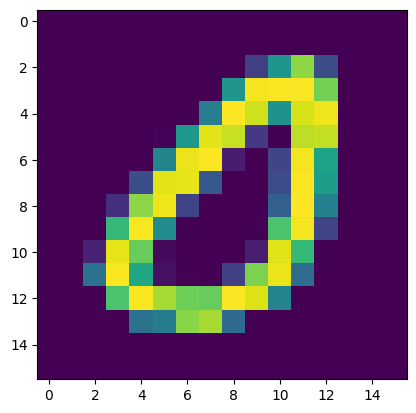

In [15]:
plt.imshow(new_train_images[689])

In [16]:
new_train_images[689]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 133, 211,  60,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 251, 253, 253, 201,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 109, 254, 236, 130, 239, 248,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   2, 135, 244, 233,  42,   1, 229, 231,
          0,   0,   0],
       [  0,   0,   0,   0,   0, 117, 247, 253,  19,   0,  53, 250, 147,
          0,   0,   0],
       [  0,   0,   0,   0,  61, 244, 245,  70,   0,   0,  59, 253, 141,
          0,   0,   0],
       [  0,   0,   0,  34, 210, 248,  52,   0,   0,   0,  78, 254, 112,
          0,   0,   0],
       [  0,   0,   0, 169, 252, 124,   1,   0,   0,   1, 182, 250,  52,
          0,   0,   0],
       [  0,   0,  25, 245, 19

In [17]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [21]:
x_train[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Name: 0, Length: 60000, dtype: float32

In [22]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [23]:
train_labels[0]

5

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [25]:
from tensorflow.keras.callbacks import TensorBoard

In [26]:
tensorboardDenso = TensorBoard(log_dir ='logs/denso')

In [27]:
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 11ms/step - loss: 0.2651 - accuracy: 0.9243 - precision: 0.9521 - val_loss: 0.1372 - val_accuracy: 0.9591 - val_precision: 0.9670
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1074 - accuracy: 0.9686 - precision: 0.9745 - val_loss: 0.0900 - val_accuracy: 0.9726 - val_precision: 0.9778
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0714 - accuracy: 0.9787 - precision: 0.9818 - val_loss: 0.0804 - val_accuracy: 0.9752 - val_precision: 0.9786
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0514 - accuracy: 0.9844 - precision: 0.9864 - val_loss: 0.0693 - val_accuracy: 0.9785 - val_precision: 0.9816
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0393 - accuracy: 0.9882 - precision: 0.9896 - val_loss: 0.0735 - val_accuracy: 0.9770 - val_precision: 0.9795
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - 

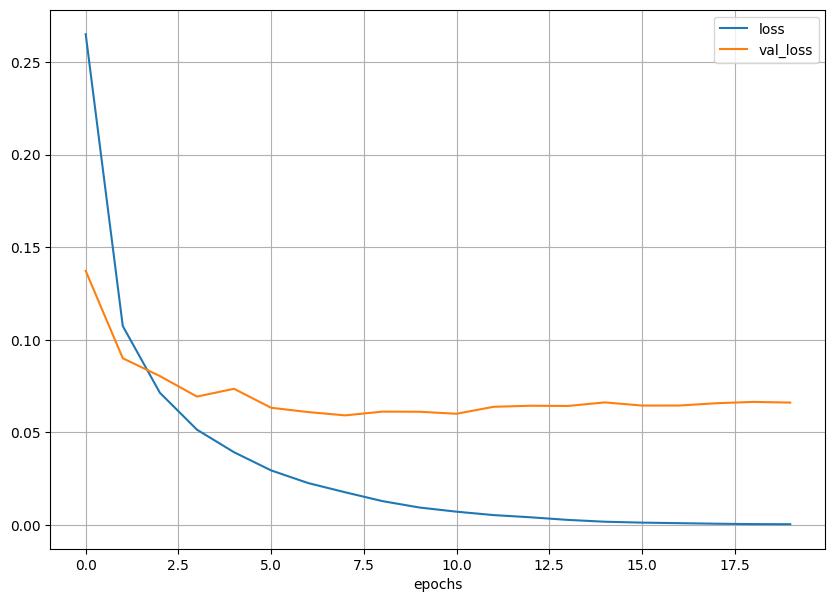

In [28]:


pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9835 - precision: 0.9844


[0.06606990098953247, 0.9835000038146973, 0.9843781590461731]

In [30]:
%load_ext tensorboard

In [31]:
 %reload_ext tensorboard

In [32]:
%tensorboard --logdir logs


<IPython.core.display.Javascript object>

In [33]:
!kill 8369

/bin/bash: line 1: kill: (8369) - No such process
